In [31]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [10]:
stock_name = 'RELIANCE'

In [11]:
features_path = f"features_{stock_name}.csv"
target_path = f"target_{stock_name}.csv"
features_path ,target_path

('features_RELIANCE.csv', 'target_RELIANCE.csv')

In [12]:
X= pd.read_csv(features_path).set_index("Date")
y= pd.read_csv(target_path).set_index("Date")

In [13]:
X.columns.to_list()

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'volume_adi',
 'volume_obv',
 'volume_cmf',
 'volume_fi',
 'volume_em',
 'volume_sma_em',
 'volume_vpt',
 'volume_vwap',
 'volume_mfi',
 'volume_nvi',
 'volatility_bbm',
 'volatility_bbh',
 'volatility_bbl',
 'volatility_bbw',
 'volatility_bbp',
 'volatility_bbhi',
 'volatility_bbli',
 'volatility_kcc',
 'volatility_kch',
 'volatility_kcl',
 'volatility_kcw',
 'volatility_kcp',
 'volatility_kchi',
 'volatility_kcli',
 'volatility_dcl',
 'volatility_dch',
 'volatility_dcm',
 'volatility_dcw',
 'volatility_dcp',
 'volatility_atr',
 'volatility_ui',
 'trend_macd',
 'trend_macd_signal',
 'trend_macd_diff',
 'trend_sma_fast',
 'trend_sma_slow',
 'trend_ema_fast',
 'trend_ema_slow',
 'trend_vortex_ind_pos',
 'trend_vortex_ind_neg',
 'trend_vortex_ind_diff',
 'trend_trix',
 'trend_mass_index',
 'trend_dpo',
 'trend_kst',
 'trend_kst_sig',
 'trend_kst_diff',
 'trend_ichimoku_conv',
 'trend_ichimoku_base',
 'trend_ichimoku_a',
 'tren

In [32]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

mse=mean_squared_error(y, y_pred)

/Users/ravinarukulla/PycharmProjects/stock_forecast/venv/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [13:29:35] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [33]:
imp = pd.DataFrame(xgb_model.feature_importances_,index=X.columns,columns=["imp_score"]).sort_values("imp_score",ascending=False)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

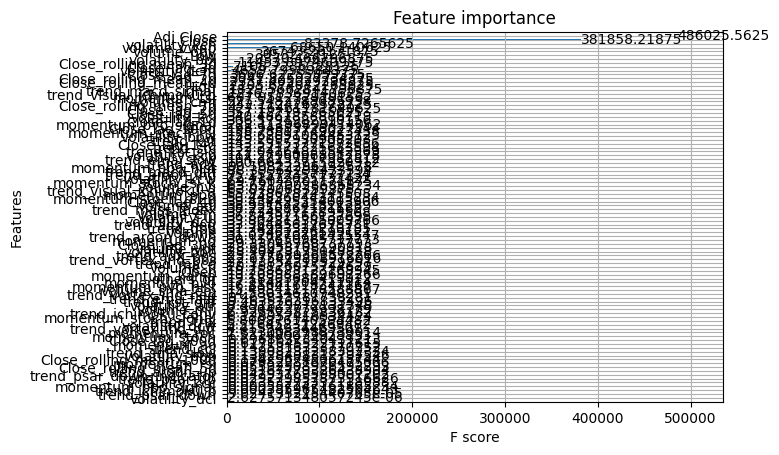

In [36]:
xgb.plot_importance(xgb_model,importance_type='gain')